# Proyecto: Análisis de Rendimiento de Campañas de Marketing

## Introducción

En este proyecto, analizarás el **"Marketing Campaign Performance"**, que contiene información detallada sobre el rendimiento de diversas campañas de marketing llevadas a cabo por una empresa en Malasia. El objetivo es aplicar técnicas de tratamiento y limpieza de datos, análisis exploratorio y visualización para extraer insights valiosos que puedan mejorar las estrategias de marketing de la empresa.

## Objetivos del Proyecto

- **Comprender y preprocesar el dataset**: Identificar y manejar valores faltantes, inconsistencias y outliers.
- **Realizar un análisis exploratorio de datos (EDA)**: Descubrir patrones y relaciones significativas entre las variables.
- **Visualizar datos**: Crear visualizaciones informativas utilizando Matplotlib, Seaborn y Plotly.
- **Extraer conclusiones**: Interpretar los resultados y proporcionar recomendaciones basadas en el análisis.

## Descripción del Dataset

El dataset incluye las siguientes características:

- **Campaign_ID**: Identificador único de cada campaña.
- **Channel**: Canal de marketing utilizado (e.g., Social Media, Email, TV, News, Radio, Billboard).
- **Product_Category**: Categoría del producto (e.g., Electronics, Fashion, Groceries, Automotive, Health).
- **Region**: Región geográfica en Malasia donde se dirigió la campaña (e.g., Kuala Lumpur, Penang, Malacca, Johor, Sabah, Sarawak).
- **Budget**: Presupuesto asignado en Ringgit malayo.
- **Spend**: Gasto real de la campaña en Ringgit malayo.
- **Impressions**: Número de veces que se vio el anuncio.
- **Clicks**: Número de clics que recibió el anuncio.
- **CTR**: Tasa de clics (Click Through Rate).
- **Conversions**: Número de acciones exitosas (e.g., compras, registros).
- **CR**: Tasa de conversión (Conversion Rate).
- **Revenue**: Ingresos generados por la campaña en Ringgit malayo.
- **ROI**: Retorno de la inversión (Revenue dividido por Spend).
- **Duration**: Duración de la campaña en días.
- **Start_Date**: Fecha de inicio de la campaña.
- **End_Date**: Fecha de finalización de la campaña.
- **Customer_Satisfaction**: Calificación de satisfacción del cliente (1 a 5).
- **Campaign_Effectiveness**: Efectividad de la campaña según el equipo de marketing (1 a 10).
- **Market_Segment**: Segmento de mercado objetivo (Low, Medium, High).

**Nota**: El dataset incluye valores faltantes para simular escenarios del mundo real.


## Pasos del Proyecto

A continuación, se detallan los pasos que deberás seguir para completar el proyecto.

### 1. Preparación del Entorno de Trabajo

- Asegúrate de tener instaladas las siguientes librerías: **Python**, **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, **Plotly**.
- Configura tu entorno de trabajo, ya sea en Jupyter Notebook, Google Colab o tu IDE preferido.

### 2. Carga de Datos

- Importa las librerías necesarias.
- Carga el dataset en un DataFrame de Pandas.

### 3. Inspección Inicial de los Datos

- Visualiza las primeras y últimas filas del DataFrame.
- Obtén información general del dataset.
- Identifica las columnas y su tipo de datos.

### 4. Limpieza de Datos

#### 4.1 Manejo de Valores Faltantes

- Identifica las columnas con valores faltantes.
- Decide cómo manejar los valores faltantes:
  - **Eliminar filas o columnas** con muchos valores faltantes.
  - **Imputar valores** utilizando métodos como media, mediana o moda.

#### 4.2 Manejo de Outliers

- Utiliza gráficos de caja (boxplots) para identificar outliers en variables numéricas.
- Decide cómo manejar los outliers:
  - **Mantenerlos** si son relevantes.
  - **Eliminarlos** si son errores.
  - **Transformarlos** utilizando métodos como logaritmos.

#### 4.3 Corrección de Inconsistencias

- Verifica y corrige inconsistencias en datos categóricos (e.g., mayúsculas/minúsculas, espacios en blanco).

### 5. Análisis Exploratorio de Datos (EDA)

#### 5.1 Análisis Univariado

- Analiza la distribución de variables numéricas.
  - Crea histogramas y gráficos KDE.
- Analiza la frecuencia de variables categóricas.
  - Crea gráficos de barras.

#### 5.2 Análisis Bivariado

- Explora relaciones entre dos variables:
  - **Numérica vs Numérica**: Gráficos de dispersión, calcular correlaciones.
  - **Categórica vs Numérica**: Gráficos de cajas, gráficos de violín.
  - **Categórica vs Categórica**: Tablas de contingencia, heatmaps.

#### 5.3 Análisis Multivariado

- Crea matrices de correlación para variables numéricas.
- Realiza análisis de clusters o segmentación si es relevante.

### 6. Visualización de Datos

- Utiliza **Matplotlib** y **Seaborn** para crear visualizaciones estáticas.
- Utiliza **Plotly** para crear visualizaciones interactivas.
- Algunas visualizaciones sugeridas:
  - **Gráficos de barras**: Ingresos por canal, ROI por categoría de producto.
  - **Mapas geográficos**: Rendimiento por región.
  - **Series temporales**: Tendencias de impresiones y clics a lo largo del tiempo.

### 7. Interpretación y Conclusiones

- Resume los hallazgos clave de tu análisis.
- Responde a preguntas como:
  - ¿Qué canales de marketing son más efectivos?
  - ¿Qué regiones generan más ingresos?
  - ¿Existe correlación entre el presupuesto y el ROI?
- Proporciona recomendaciones para futuras campañas.

### 8. Documentación y Presentación

- Documenta todo el proceso, incluyendo código y visualizaciones.
- Prepara una presentación o informe que resuma tus hallazgos.
- Asegúrate de que tus conclusiones estén respaldadas por los datos.

## Recomendaciones Adicionales

- **Gestión del Tiempo**: Distribuye tu tiempo de manera efectiva para cubrir todos los pasos del proyecto.
- **Buenas Prácticas de Codificación**: Escribe código limpio y comentado.
- **Verificación de Resultados**: Siempre verifica tus cálculos y resultados para asegurar su exactitud.
- **Exploración Adicional**: Si el tiempo lo permite, explora técnicas más avanzadas como modelos predictivos o segmentación de clientes.

### **1. Environment Setup**

In [1]:
# Import necessary libraries

import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive plotting
import math

### **2. Data Loading**

In [4]:
# Load the dataset into a Pandas DataFrame

file_path ='C:\\Users\\inesc\\OneDrive\\Documentos\\GitHub\\Marketing_Campaign_Performance_Analysis\\mcp_1.csv'
data = pd.read_csv(file_path)

### **3. Initial Data Inspection**

In [13]:
# Concatenate the first 5 and last 5 rows
data_top_bottom = pd.concat([data.head(), data.tail()])

# Apply styling with highlighted missing values and formatted columns
styled_data = data_top_bottom.style \
    .highlight_null() \
    .format({'Budget': "{:,.2f}", 'Spend': "{:,.2f}", 'Revenue': "{:,.2f}", 'ROI': "{:.2f}"}) \
    .set_properties(**{'border': '1px solid black', 'color': 'black'}) \
    .set_caption("First and Last 5 Rows of the Marketing Campaign Dataset")

display(styled_data)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,"484,341.00","197,038.00",545901.000000,nan,0.078500,7993.000000,0.341400,"849,005.00",0.64,212.000000,2/3/2023,23/12/2023,3.000000,3.000000,Medium
1,CAM0002,nan,Health,Sarawak,"468,792.00","33,743.00",527513.000000,4130.000000,0.947900,9459.000000,nan,"921,078.00",3.78,29.000000,nan,nan,3.000000,7.000000,Medium
2,CAM0003,Radio,Electronics,Penang,"10,487.00","6,745.00",806911.000000,12209.000000,nan,7168.000000,0.051700,"51,142.00",3.64,74.000000,12/4/2023,20/10/2023,1.000000,2.000000,Medium
3,CAM0004,Email,Electronics,Penang,"345,431.00","329,112.00",108570.000000,34391.000000,0.615700,7190.000000,0.357900,"191,887.00",2.64,67.000000,24/4/2023,26/1/2023,5.000000,6.000000,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,"322,345.00","34,365.00",799855.000000,13056.000000,nan,1794.000000,0.054400,"167,241.00",1.02,40.000000,10/1/2023,1/1/2023,5.000000,6.000000,Low
4995,CAM4996,Email,Automotive,Kuala Lumpur,"373,204.00","239,182.00",947505.000000,27359.000000,0.444600,2725.000000,0.164300,"739,721.00",17.29,170.000000,4/4/2023,15/12/2023,4.000000,5.000000,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,"81,357.00","381,641.00",270685.000000,2575.000000,0.822400,1555.000000,0.242500,"324,435.00",1.50,148.000000,28/1/2023,26/12/2023,2.000000,7.000000,Low
4997,CAM4998,Radio,nan,Kuala Lumpur,"216,060.00","122,475.00",6042568.044000,42563.000000,0.589400,nan,nan,"647,246.00",nan,340.000000,7/6/2023,6/12/2023,3.000000,5.000000,nan
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,"120,531.00","433,558.00",857140.000000,7037.000000,0.286300,3374.000000,0.903900,"373,110.00",0.39,76.000000,2/11/2023,23/8/2023,2.000000,1.000000,Medium
4999,CAM5000,TV,Automotive,Sabah,"476,378.00","261,529.00",308009.000000,45922.000000,0.518700,3047.000000,0.043800,"146,303.00",0.77,330.000000,1/1/2023,6/11/2023,1.000000,1.000000,High


In [6]:
# Get general information about the dataset

print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date        

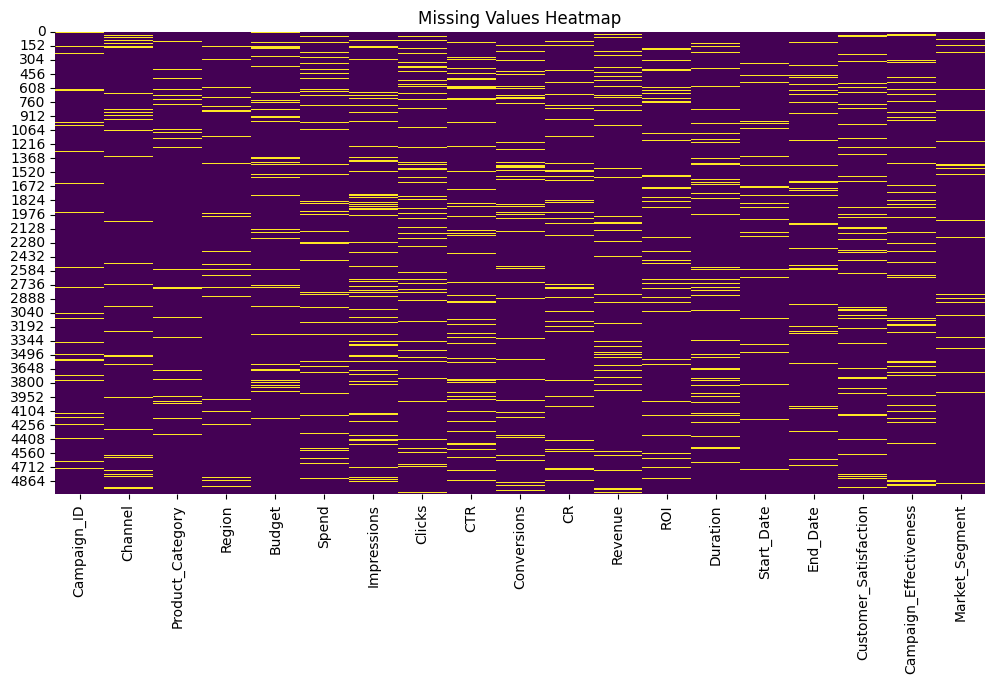

In [8]:
# Heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
# Display column names and their data types
print("\nColumns and their data types:")
print(data.dtypes)


Columns and their data types:
Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object


### **4. Data Cleaning**

#### **4.1 Handling Missing Values**

In [14]:
# Identify columns with missing values

missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("\nColumns with missing values and their count:")
print(missing_data)


Columns with missing values and their count:
Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64


In [18]:
# Define a strategy for handling missing values:
# - Drop columns with high missing values if they are not crucial to analysis
# - Impute remaining missing values based on column type

# Drop columns with more than 50% missing values (if any)
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)

# Impute missing values for numeric columns with mean or median, categorical with mode

for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            # Fill categorical columns with mode without inplace
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            # Fill numerical columns with median without inplace
            data[column] = data[column].fillna(data[column].median())

In [19]:
# Verify missing values have been handled
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
dtype: int64


#### **4.2 Handling Outliers**

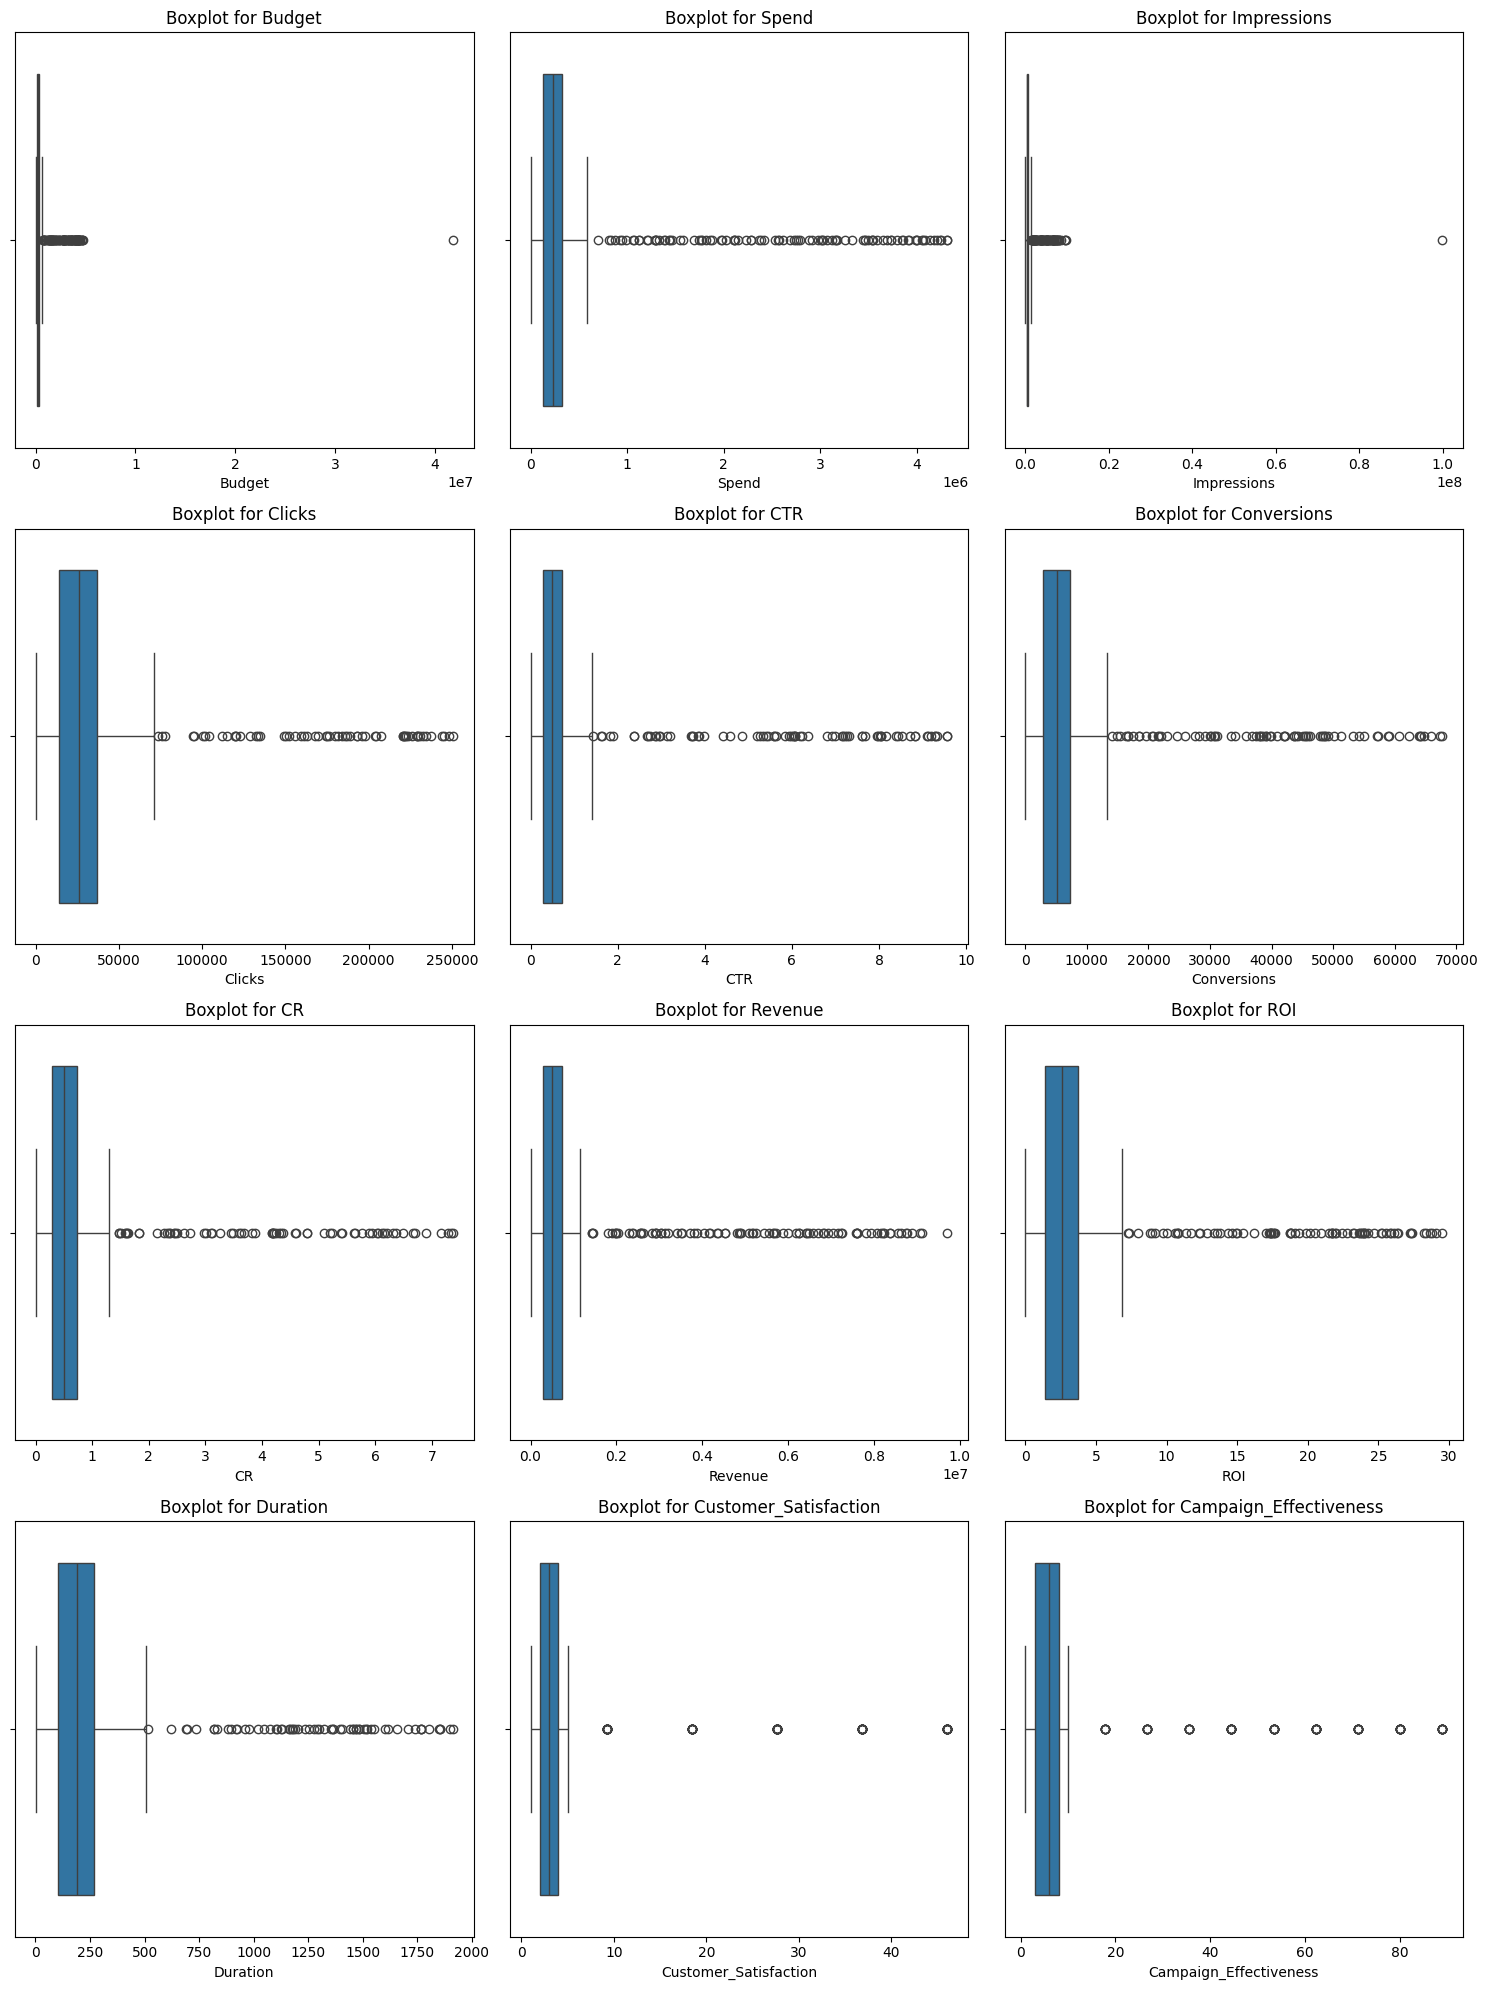

In [21]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots grid
num_cols = 3  # Number of columns
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Number of rows

# Create subplots for each numerical column
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size for more rows if needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [22]:
# Decide handling strategy:
# - Keep, transform, or remove extreme outliers based on domain knowledge

# Example: Removing outliers beyond 1.5 * IQR (common practice, customize if necessary)
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#### **4.3 Fixing Inconsistencies in Categorical Data**

In [23]:
# Standardize formatting for categorical columns (e.g., case and whitespace)

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower()

# Confirm no inconsistencies in categorical columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print()

Unique values in Campaign_ID:
['cam0001' 'cam0002' 'cam0003' ... 'cam4997' 'cam4999' 'cam5000']

Unique values in Channel:
['billboard' 'radio' 'email' 'tv' 'social media']

Unique values in Product_Category:
['fashion' 'health' 'electronics' 'automotive' 'groceries']

Unique values in Region:
['kuala lumpur' 'sarawak' 'penang' 'johor' 'sabah']

Unique values in Start_Date:
['2/3/2023' '11/9/2023' '12/4/2023' '24/4/2023' '10/1/2023' '16/8/2023'
 '21/6/2023' '22/5/2023' '20/6/2023' '18/2/2023' '7/1/2023' '1/12/2023'
 '5/5/2023' '18/12/2023' '28/11/2023' '3/3/2023' '4/8/2023' '25/7/2023'
 '6/10/2023' '2/4/2023' '16/3/2023' '7/9/2023' '28/6/2023' '22/3/2023'
 '18/1/2023' '16/9/2023' '28/1/2023' '26/8/2023' '13/4/2023' '13/8/2023'
 '2/2/2023' '24/2/2023' '19/1/2023' '23/6/2023' '29/1/2023' '12/3/2023'
 '28/2/2023' '28/8/2023' '9/12/2023' '1/5/2023' '25/9/2023' '13/1/2023'
 '1/7/2023' '10/8/2023' '23/4/2023' '14/9/2023' '7/6/2023' '11/10/2023'
 '30/12/2023' '31/8/2023' '22/12/2023' '23/5/20

### **5: Exploratory Data Analysis (EDA)**

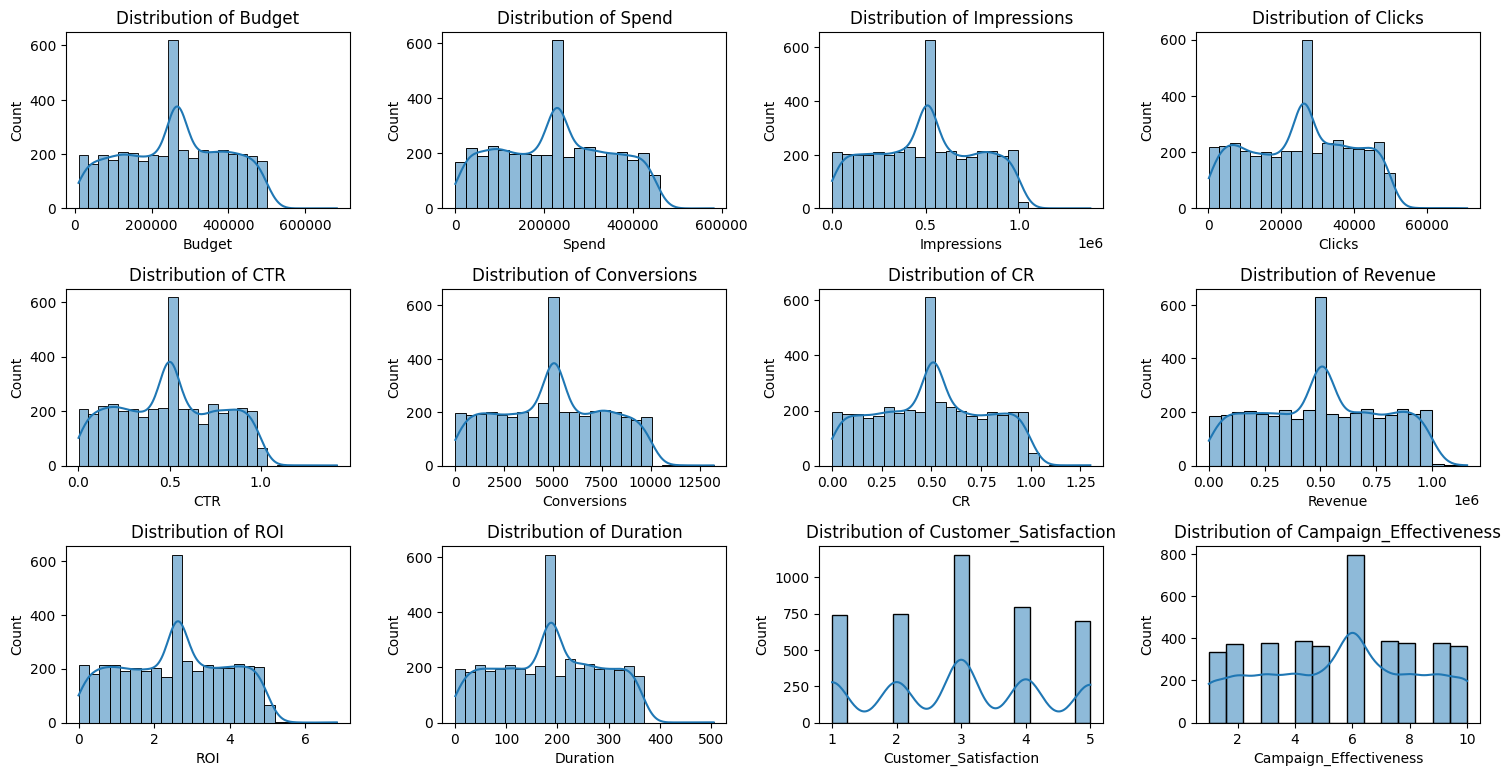

C:\Users\inesc\AppData\Local\Temp\ipykernel_34764\3782981958.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', order=data[col].value_counts().index)
C:\Users\inesc\AppData\Local\Temp\ipykernel_34764\3782981958.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', order=data[col].value_counts().index)
C:\Users\inesc\AppData\Local\Temp\ipykernel_34764\3782981958.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', order=data[col].value_count

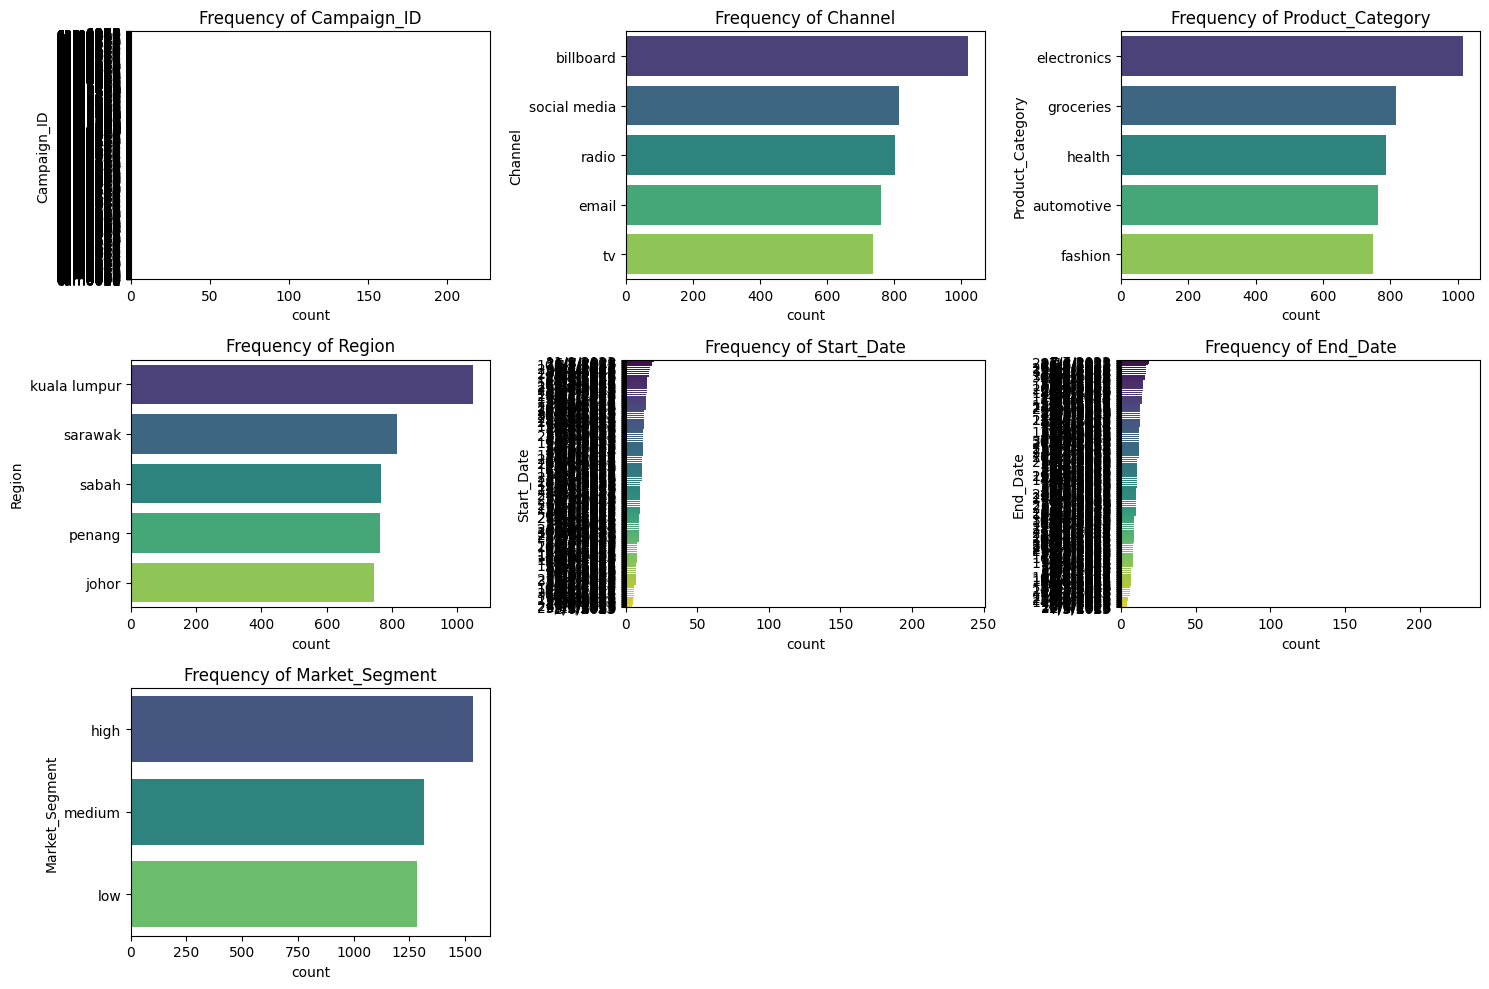

In [24]:
# 5.1.1 Distribution of Numerical Variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 5.1.2 Frequency of Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=data[col], palette='viridis', order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()